In [1]:
# importing all modules needed for prediction
import pickle 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# machine learning libraries
import tensorflow as tf
import edward as ed

# bayesian neural network
from network_details import BayesianNeuralNetwork

In [2]:
# initializing an abstract network object
bnn = BayesianNeuralNetwork()

In [3]:
# get training set details
details = pickle.load(open('model/training_set_specs.pkl', 'rb'))
for att in ['mean_features', 'std_features', 'mean_targets', 'std_targets', 'max_targets', 'min_targets']:
    setattr(bnn.manager, att, details[att])

In [4]:
# constructing the network architecture 
bnn.construct_networks()

... constructing network


In [5]:
# loading the network parameters
sess  = ed.get_session()
saver = tf.train.Saver()
saver.restore(sess, 'model/bnn.ckpt')
#saver.restore(sess, 'model/tmp_bnn.ckpt')

INFO:tensorflow:Restoring parameters from model/bnn.ckpt


In [8]:
# generate fake data
samples       = np.random.dirichlet(alpha = np.ones(5), size = 100)
#samples       = np.random.uniform(low = 0, high = 1, size = (250, 5))
values, _, _  = bnn.predict(samples, n_post = 500, rescale = True)

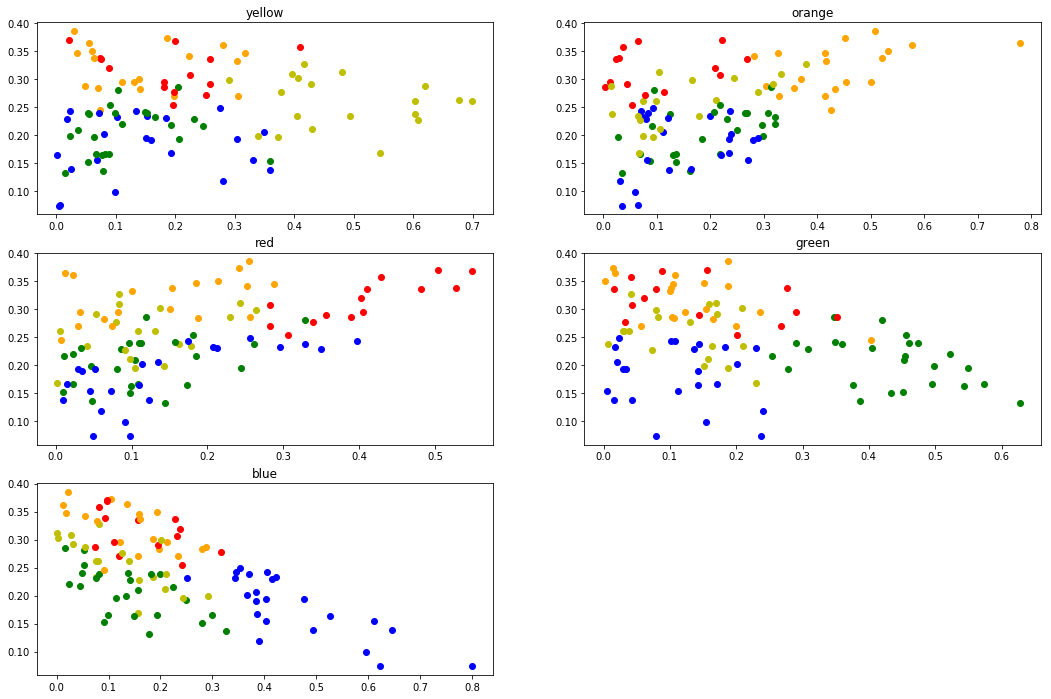

In [9]:
fig = plt.figure(figsize = (18, 12))
ax0 = plt.subplot2grid((3, 2), (0, 0))
ax1 = plt.subplot2grid((3, 2), (0, 1))
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0))
#ax5 = plt.subplot2grid((3, 2), (2, 1))
axs = [ax0, ax1, ax2, ax3, ax4]

titles = ['yellow', 'orange', 'red', 'green', 'blue']
colors = ['y', 'orange', 'r', 'g', 'b']

for index in range(5):
    axs[index].set_title(titles[index])
#    axs[index].set_ylim(0, 0.6)

for sample_index, sample in enumerate(samples):
    norm_sample = sample / np.sum(sample)
    for index in range(5):
        ax = axs[index]
        ax.plot(norm_sample[index], values[sample_index], marker = 'o', ls = '', color = colors[np.argmax(sample)])

plt.show()